In [165]:
# Imports
# (1) pandas for reading the file
# (2) matplotlib for plotting
# (3) numpy for numerical python: Mathematical functions, arrays

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

wdf = pd.read_csv("data-files/WeatherData.csv")
#display(wdf)
wdf.head()

,Temperature(C),Humidity
0,9.472222,0.89
1,9.355556,0.86
2,9.377778,0.89
3,8.288889,0.83
4,8.755556,0.83


In [166]:
# Renaming the columns
wdf.rename(columns={'Temperature(C)':'temp', 'Humidity':'Humidity'}, inplace=True)
wdf.head()

,temp,Humidity
0,9.472222,0.89
1,9.355556,0.86
2,9.377778,0.89
3,8.288889,0.83
4,8.755556,0.83


(array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

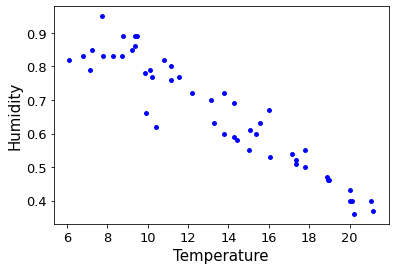

In [167]:
# Data visualization: 
    # Check if Linear regression is applicable --> By plotting it

plt.scatter(wdf.temp, wdf.Humidity, s = 15, c = "blue") # scatter Plot --> dots/points
plt.xlabel("Temperature", fontsize=15)
plt.ylabel("Humidity", fontsize=15)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13, rotation=0)

In [168]:
from sklearn.linear_model import LinearRegression

# Prepare data to input as an argument in LinReg model (2d-array)
features_df = wdf[['temp']]
target_val   = wdf.Humidity

# Other option for reshaping the data (2 make it 2-d array)
    # if the data has only one point --> .reshape(1,-1)
    # (1) features_df = wdf['temp'].values.reshape(-1,1) # --> convert to 2d array
    # (2) features_df = pd.DataFrame({'temp': wdf.temp}) # --> create dataframe
    # display(features_df) # finally you can display your data

display(features_df.head())
display(target_val.head())

,temp
0,9.472222
1,9.355556
2,9.377778
3,8.288889
4,8.755556


0    0.89
1    0.86
2    0.89
3    0.83
4    0.83
Name: Humidity, dtype: float64


Intercept: 1.1336757355537121, coeffecient: [-0.03522051]

Mean Absolute Error = 0.041421689636499476



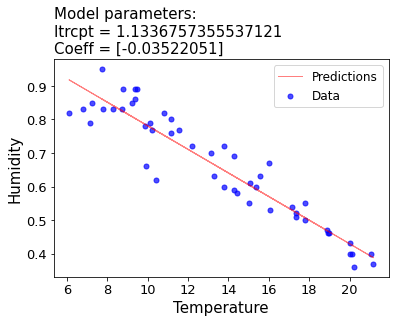

In [169]:
# Previously defined: 
features_df = wdf[['temp']]
target_val  = wdf.Humidity

from sklearn.metrics import mean_absolute_error

# Define the model
# LinearRegression(fit_intercept=True, normalize=False, copy_X=True)
reg_model = LinearRegression()


# fitting
reg_model.fit(features_df, target_val)
# Print fitted parameters
print(f"\nIntercept: {reg_model.intercept_}, coeffecient: {reg_model.coef_}")


# What is the prediction ?
        # Note: Make sure 'regressor (feature)' is again in the dataframe format
prediction = reg_model.predict(wdf[['temp']])
#display(prediction)


# What is the Error?
error = mean_absolute_error(target_val, prediction)
print(f"\nMean Absolute Error = {error}\n")


# How does prediction looks like? Actual Vs prediction
    # --> Plot it with the actual data
        # Plot options: s = point size, c = point color, alpha = transparency  
plt.scatter(wdf.temp, wdf.Humidity, s = 25, c = "blue", alpha = 0.7, label = "Data")
plt.xlabel("Temperature", fontsize=15)
plt.ylabel("Humidity", fontsize=15)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13, rotation=0)
plt.title(f"Model parameters:\nItrcpt = {reg_model.intercept_}\nCoeff = {reg_model.coef_}",\
          loc='left', fontsize=15)


plt.plot(wdf.temp, prediction, c = "red", lw = 1, alpha = 0.5, label = "Predictions")

plt.legend(fontsize=12, loc = 0) # loc -> location [0, 10]


Intercept: 1.1336757355537121, coeffecient: [-0.03522051]

Mean Absolute Error = 0.041421689636499476


Predicted value of Humidity at temp 12.5 [K] is: [0.69341936]

Predicted value of Humidity at temp 12.5 [K] is: 0.6934193572107629


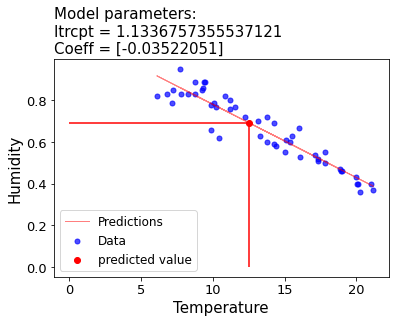

In [170]:
# Previously defined: 
features_df = wdf[['temp']]
target_val  = wdf.Humidity

from sklearn.metrics import mean_absolute_error

# Define the model
# LinearRegression(fit_intercept=True, normalize=False, copy_X=True)
reg_model = LinearRegression()


# fitting
reg_model.fit(features_df, target_val)
# Print fitted parameters
print(f"\nIntercept: {reg_model.intercept_}, coeffecient: {reg_model.coef_}")


# What is the prediction ?
        # Note: Make sure 'regressor (feature)' is again in the dataframe format
prediction = reg_model.predict(wdf[['temp']])
#display(prediction)


# What is the Error?
error = mean_absolute_error(target_val, prediction)
print(f"\nMean Absolute Error = {error}\n")


# How does prediction looks like? Actual Vs prediction
    # --> Plot it with the actual data
        # Plot options: s = point size, c = point color, alpha = transparency  
plt.scatter(wdf.temp, wdf.Humidity, s = 25, c = "blue", alpha = 0.7, label = "Data")
plt.xlabel("Temperature", fontsize=15)
plt.ylabel("Humidity", fontsize=15)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13, rotation=0)
plt.title(f"Model parameters:\nItrcpt = {reg_model.intercept_}\nCoeff = {reg_model.coef_}",\
          loc='left', fontsize=15)


plt.plot(wdf.temp, prediction, c = "red", lw = 1, alpha = 0.5, label = "Predictions")

# ====================================================================================
# Prediction at a given value
temp1       = 12.5
pred1       = reg_model.predict([[temp1]])

print(f"\nPredicted value of Humidity at temp {temp1} [K] is: {pred1}")
print(f"\nPredicted value of Humidity at temp {temp1} [K] is: {pred1[0]}")

plt.scatter(temp1, pred1, color ='r', label = "predicted value")
plt.vlines(x = temp1, ymin = 0.0, ymax = pred1, color = 'r')
plt.hlines(y = pred1, xmin = 0.0, xmax = temp1, color = 'r')

# ====================================================================================

plt.legend(fontsize=12, loc = 0) # loc -> location [0, 10]
#plt.xlim(-7,22)